**OVERVIEW**

You have decided to form a startup called “LingoRank” with your University friend and become a millionaire. You have until the end the semester to create a proof of concept for your investors. Your startup will revolutionize the way people learn and get better at a foreign language.

**THE IDEA**

You have noticed that to improve one’s skills in a new foreign language, it is important to read texts in that language. These texts have to be at the reader’s language level. However, it is difficult to find texts that are close to someone’s knowledge level (A1 to C2). You have decided to build a model for English speakers that predicts the difficulty of a French written text. This can be then used, e.g., in a recommendation system, to recommend texts, e.g, recent news articles that are appropriate for someone’s language level. If someone is at A1 French level, it is inappropriate to present a text at B2 level, as she won’t be able to understand it. Ideally, a text should have many known words and may have a few words that are unknown so that the person can improve.

The code in this cell is installing/upgrading several Python packages using pip. These packages include scikit-learn, keras, tensorflow, pandas, numpy, matplotlib, and torch. Additionally, there seems to be a typo in the last line where "ipgrade" should be "upgrade". The purpose of this code is to ensure that the required packages are installed or updated to their latest versions before proceeding with the rest of the code.

In [6]:
!pip install --upgrade scikit-learn
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade torch
!pip install --ipgrade nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b2/e4/30b53d839608d2212b97972a8516ba0c7e776ee1102eaa82624807b944cf/keras-3.0.1-py3-none-any.whl.metadata
  Using cached keras-3.0.1-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.1-py3-none-any.whl (999 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for

The code in this cell imports several Python packages and libraries that are commonly used in data science and machine learning tasks. Here is a brief description of each import statement:

 - import pandas as pd: This imports the pandas library and assigns it the alias pd. Pandas is a powerful data manipulation and analysis library that provides data structures and functions for efficiently working with structured data.

 - import nltk: This imports the nltk library, which stands for Natural Language Toolkit. NLTK is a popular library for natural language processing tasks, such as tokenization, stemming, and part-of-speech tagging...

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

Downloading the data :

The code in this cell is responsible for downloading and loading data from CSV files into pandas dataframes. It also downloads the NLTK stopwords corpus if it has not been downloaded already.

Here is a breakdown of the code:

 - sample_submission_df = pd.read_csv('sample_submission.csv'): This line reads the contents of the 'sample_submission.csv' file and stores it in the sample_submission_df dataframe.

 - training_data_df = pd.read_csv('training_data.csv'): This line reads the contents of the 'training_data.csv' file and stores it in the training_data_df dataframe.

 - unlabelled_test_data_df = pd.read_csv('unlabelled_test_data.csv'): This line reads the contents of the 'unlabelled_test_data.csv' file and stores it in the unlabelled_test_data_df dataframe.

In [8]:

# download the data from the given URLs and store them in dataframes
sample_submission_df = pd.read_csv('sample_submission.csv')
training_data_df = pd.read_csv('training_data.csv')
unlabelled_test_data_df = pd.read_csv('unlabelled_test_data.csv')

print(training_data_df.shape)
training_data_df.head()
# download the stopwords corpus if not already downloaded
nltk.download('stopwords')
nltk.download('punkt') 

(4800, 3)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Cleaning the data

In [9]:
# Drop any rows with missing values
training_data_df.dropna(inplace=True)

# Remove any duplicates
training_data_df.drop_duplicates(inplace=True)

print(training_data_df.shape)

(4800, 3)


Building the firt model using nltkFreqDist

In [10]:
print(training_data_df['sentence'][0])

Les coûts kilométriques réels peuvent diverger sensiblement des valeurs moyennes en fonction du moyen de transport utilisé, du taux d'occupation ou du taux de remplissage, de l'infrastructure utilisée, de la topographie des lignes, du flux de trafic, etc.


Accuracy: 0.4125


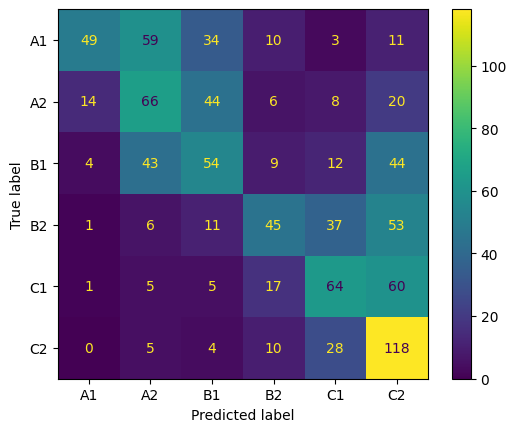

In [11]:

# import the necessary libraries
import matplotlib.pyplot as plt

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_data_df['sentence'], training_data_df['difficulty'], test_size=0.2, random_state=42)

# vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# train the model
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test_vec)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# display the accuracy of the model
print('Accuracy:', accuracy)






In [12]:

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(training_data_df['sentence'])
X_test_vec = vectorizer.transform(unlabelled_test_data_df['sentence'])

# train the model on the full training dataset
clf = MultinomialNB()
clf.fit(X_train_vec, training_data_df['difficulty'])

# make predictions on the test set
y_pred = clf.predict(X_test_vec)

# create a dataframe with the predictions
predictions_df = pd.DataFrame({'id': unlabelled_test_data_df['id'], 'difficulty': y_pred})

# display the dataframe
print(predictions_df)


        id difficulty
0        0         C2
1        1         A2
2        2         A1
3        3         A1
4        4         C2
...    ...        ...
1195  1195         B1
1196  1196         A2
1197  1197         C2
1198  1198         C2
1199  1199         B1

[1200 rows x 2 columns]


**MODEL : TF-IDF model**

Here we use a TF-IDF 

                                                 X_test y_test y_pred
596                             Je peux m'asseoir ici ?     A1     A1
3370  C'est la couleur de nombreux fruits et légumes...     A1     A1
3048  Pas au point qu'il faille en limiter la consom...     C2     C2
2908  Les Français ne cèdent pas au chacun pour soi,...     B2     C2
8     J'ai retrouvé le plaisir de manger un oeuf à l...     A2     A2
...                                                 ...    ...    ...
2968                                  Il fait très beau     A2     A1
198   Nous apportons des arguments experimentaux et ...     C2     C2
2422  La montée des valeurs humanistes est une réali...     B2     B2
1485  La "visio" atténuera sans doute l'émotion des ...     C1     C2
402   Lucien Neuwirth, pionnier de la contraception,...     C1     B2

[960 rows x 3 columns]
----------- RESULTS -----------
Accuracy: 0.45416666666666666


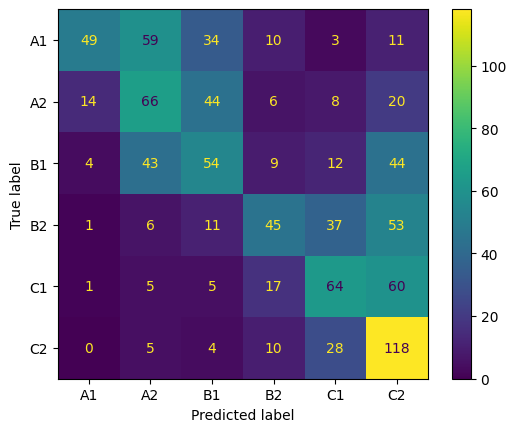

In [13]:

# import the necessary libraries

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_data_df['sentence'], training_data_df['difficulty'], test_size=0.2, random_state=42)

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# train the model
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test_vec)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# create a dataframe with X_test, y_test, and y_pred
df = pd.DataFrame({'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred})

# display the dataframe
print(df)
print('----------- RESULTS -----------')

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# display the accuracy of the model
print('Accuracy:', accuracy)




In [88]:
import os
import random
import string
import datetime

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(training_data_df['sentence'])
X_test_vec = vectorizer.transform(unlabelled_test_data_df['sentence'])

# train the model on the full training dataset
clf = MultinomialNB()
clf.fit(X_train_vec, training_data_df['difficulty'])

# make predictions on the test set
y_pred = clf.predict(X_test_vec)

# create a dataframe with the predictions
predictions_df = pd.DataFrame({'id': unlabelled_test_data_df['id'], 'difficulty': y_pred})

# display the dataframe
print(predictions_df)

# create the folder if it doesn't exist
if not os.path.exists('Predictions-Folder'):
    os.makedirs('Predictions-Folder')

# get the current date and time
now = datetime.datetime.now()

# create the filename with the current date and time
filename = f'predictions_{now.strftime("%Y-%m-%d_%H-%M-%S")}.csv'

# write the predictions dataframe to a CSV file in the Predictions-Folder
predictions_df.to_csv(f'Predictions-Folder/{filename}', index=False)

print(f'Predictions saved to Predictions-Folder/{filename}')


        id difficulty
0        0         C2
1        1         A2
2        2         A1
3        3         A1
4        4         C2
...    ...        ...
1195  1195         B1
1196  1196         A2
1197  1197         C2
1198  1198         C2
1199  1199         B1

[1200 rows x 2 columns]
Predictions saved to Predictions-Folder/predictions_2023-11-14_17-00-49.csv
